In [3]:
# Find leaders and laggards
# Find what stocks move together
# The relationship between stocks should be static, i.e. should not change over time
# When stock move, usually the percentage change is mentioned, so the algorithm should be able to handle different orders of magnitude
# A model should be as simple as possible, but no simpler than that
# Not too many parameters


In [4]:
# Problem statement
# Trading strategy to trade a universe of 50 stocks over a number of days
# Every day, there's one price update for each stock, after the update 
# you can buy/sell at that price
# Position can be negative (short selling) or positive (long position)
# Dollar position (price * number of shares) should be less than 10000
# Commission: 0.001 per dollar traded
# Scored using utility function mean(pl) - 0.1 * stddev(pl)
# pl = sum(price_change * position)

# Implement a function called getMyPosition(prcSoFar)
# prcSoFar is a 50xN matrix of stock prices so far
# Return a 50x1 vector of position
# Saved in python file teamName.py

# Evaluated on 1250 days of data
# first 500 days available at the beginning

# eval.py is used to evaluate the function

# General advice:
# Be nimble, don't get anchored on one idea
# Creative, dont overcomplicate
# Focus on thought process
# Have fun and learn


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'prophet'

In [3]:
# data = pd.read_csv("prices.txt", header=None, delimiter="  ")
# data.to_csv("prices0to500.csv", index=False)
data = pd.read_csv("prices0to500.csv", header=None)
data.drop(0, axis="rows", inplace=True)

In [36]:
data_pct = data.pct_change()
# data_pct.drop([0, 1], axis=1, inplace=True)
data_pct.dropna(inplace=True)

In [5]:
print("dim of data_pct:", data_pct.shape)
print("dim of data:", data.shape)

dim of data_pct: (500, 48)
dim of data: (500, 50)


In [9]:
data_pct.head()

,2,3,4,5,6,7,8,9,10,11,...,40,41,42,43,44,45,46,47,48,49
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.001238,-0.000396,-0.000768,-0.003846,-0.001581,0.002725,0.003454,-0.000600,-0.014170,0.012773,...,-0.003676,0.003766,-0.001383,0.014761,-0.001907,-0.000760,-0.002635,0.001380,-0.003265,-0.000178
3,-0.000824,0.002376,-0.004994,-0.012355,0.001583,0.002926,-0.001864,-0.012017,0.010560,0.007075,...,-0.001230,0.006611,0.004155,-0.012874,0.006823,-0.001712,0.005691,0.003309,-0.005733,-0.003210
4,-0.001238,0.002568,-0.002703,-0.010164,-0.001054,0.015840,-0.000862,0.006892,-0.000290,0.000916,...,0.003387,-0.000355,-0.006897,-0.005251,0.001355,-0.001715,-0.001213,0.000550,0.009061,0.004293
5,-0.000413,-0.001970,0.006001,-0.003160,-0.003692,0.002872,0.002013,-0.004228,-0.005807,-0.012206,...,0.001534,0.000000,-0.002778,0.004768,0.002436,0.000763,0.007487,0.000275,-0.017551,-0.004275


In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
1,13.46,71.65,48.46,50.52,52.10,13.00,18.98,47.71,69.49,49.96,...,32.64,55.76,14.46,58.94,36.71,52.62,49.33,36.22,49.00,56.09
2,13.48,72.10,48.52,50.50,52.06,12.95,18.95,47.84,69.73,49.93,...,32.52,55.97,14.44,59.81,36.64,52.58,49.20,36.27,48.84,56.08
3,13.47,72.35,48.48,50.62,51.80,12.79,18.98,47.98,69.60,49.33,...,32.48,56.34,14.50,59.04,36.89,52.49,49.48,36.39,48.56,55.90
4,13.53,72.51,48.42,50.75,51.66,12.66,18.96,48.74,69.54,49.67,...,32.59,56.32,14.40,58.73,36.94,52.40,49.42,36.41,49.00,56.14
5,13.64,71.99,48.40,50.65,51.97,12.62,18.89,48.88,69.68,49.46,...,32.64,56.32,14.36,59.01,37.03,52.44,49.79,36.42,48.14,55.90


<Axes: >

<Figure size 2000x1000 with 0 Axes>

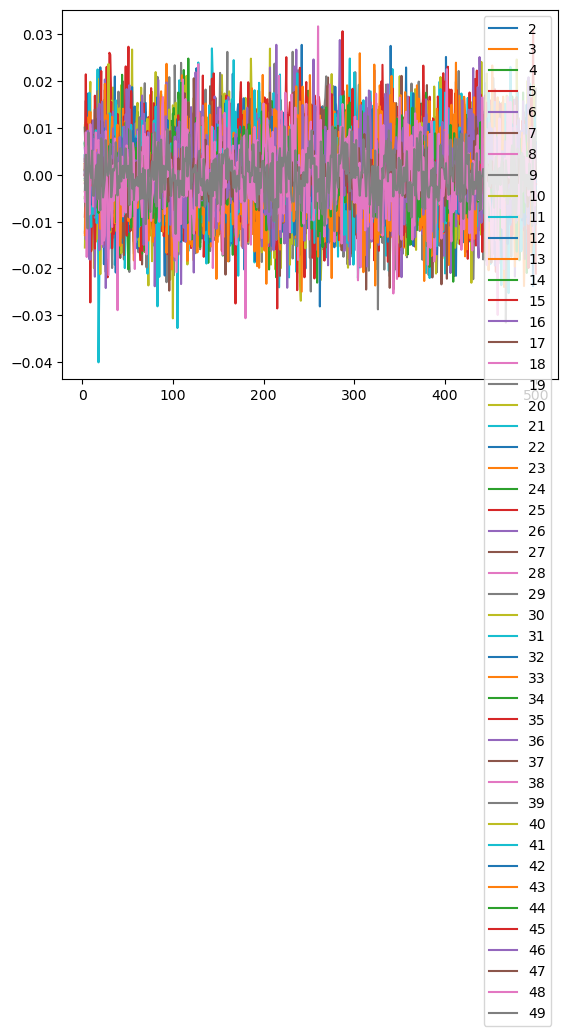

In [11]:
plt.figure(figsize=(20,10))
data_pct[1:].plot()

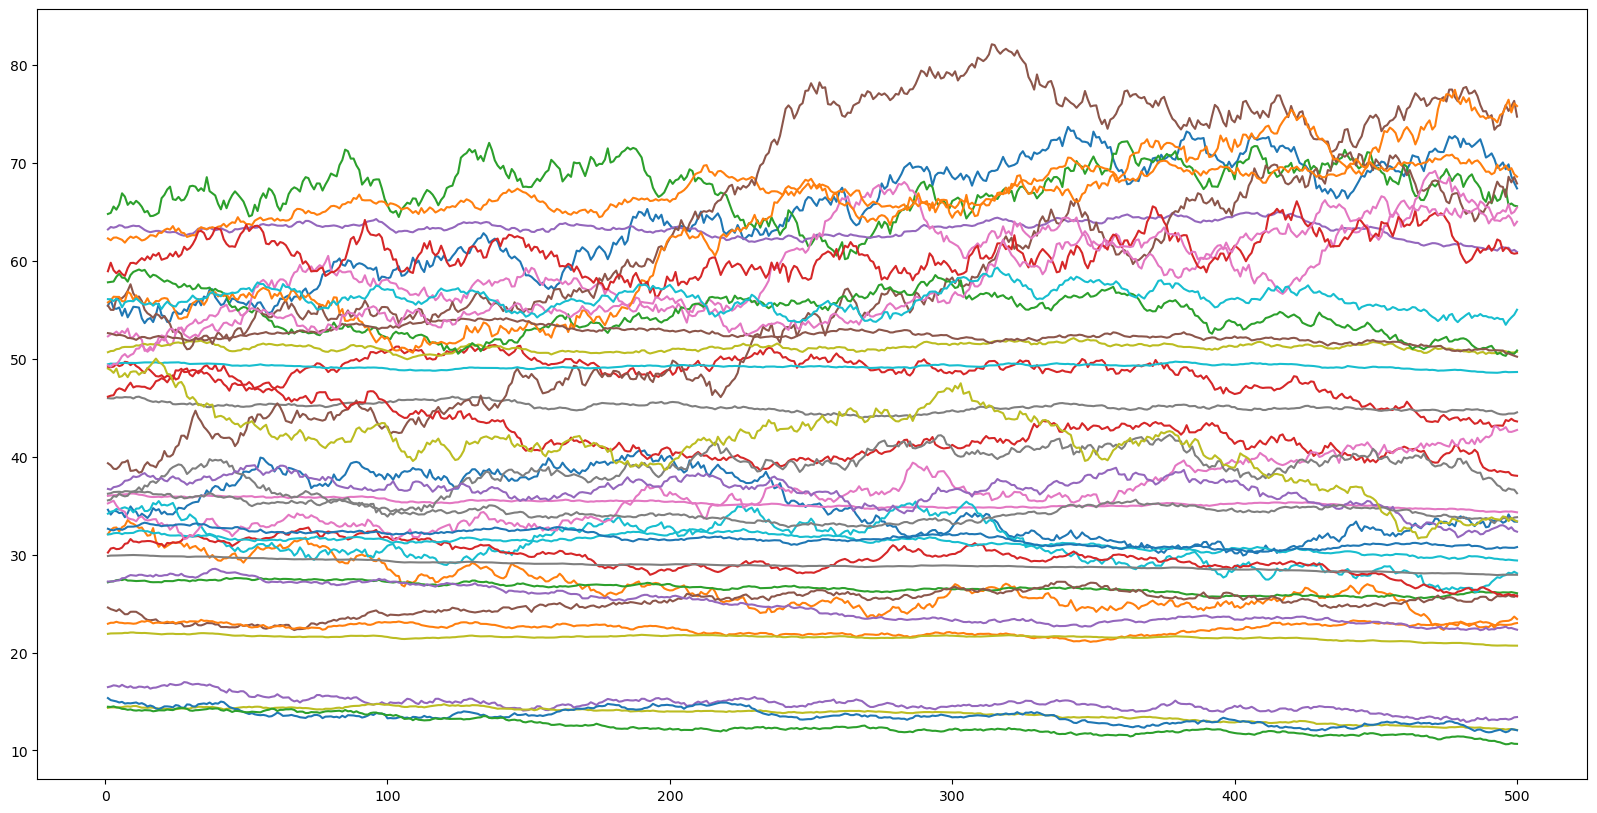

In [13]:
stock_start = 10   # Modify to view different stocks
stock_end = 50    # Modify to view different stocks
def plot_stocks_in_range(stock_start, stock_end, l_data = data):
    plt.figure(figsize=(20,10))
    for i in range(stock_start, stock_end):
        plt.plot(l_data[i])
    plt.show()
plot_stocks_in_range(stock_start, stock_end)

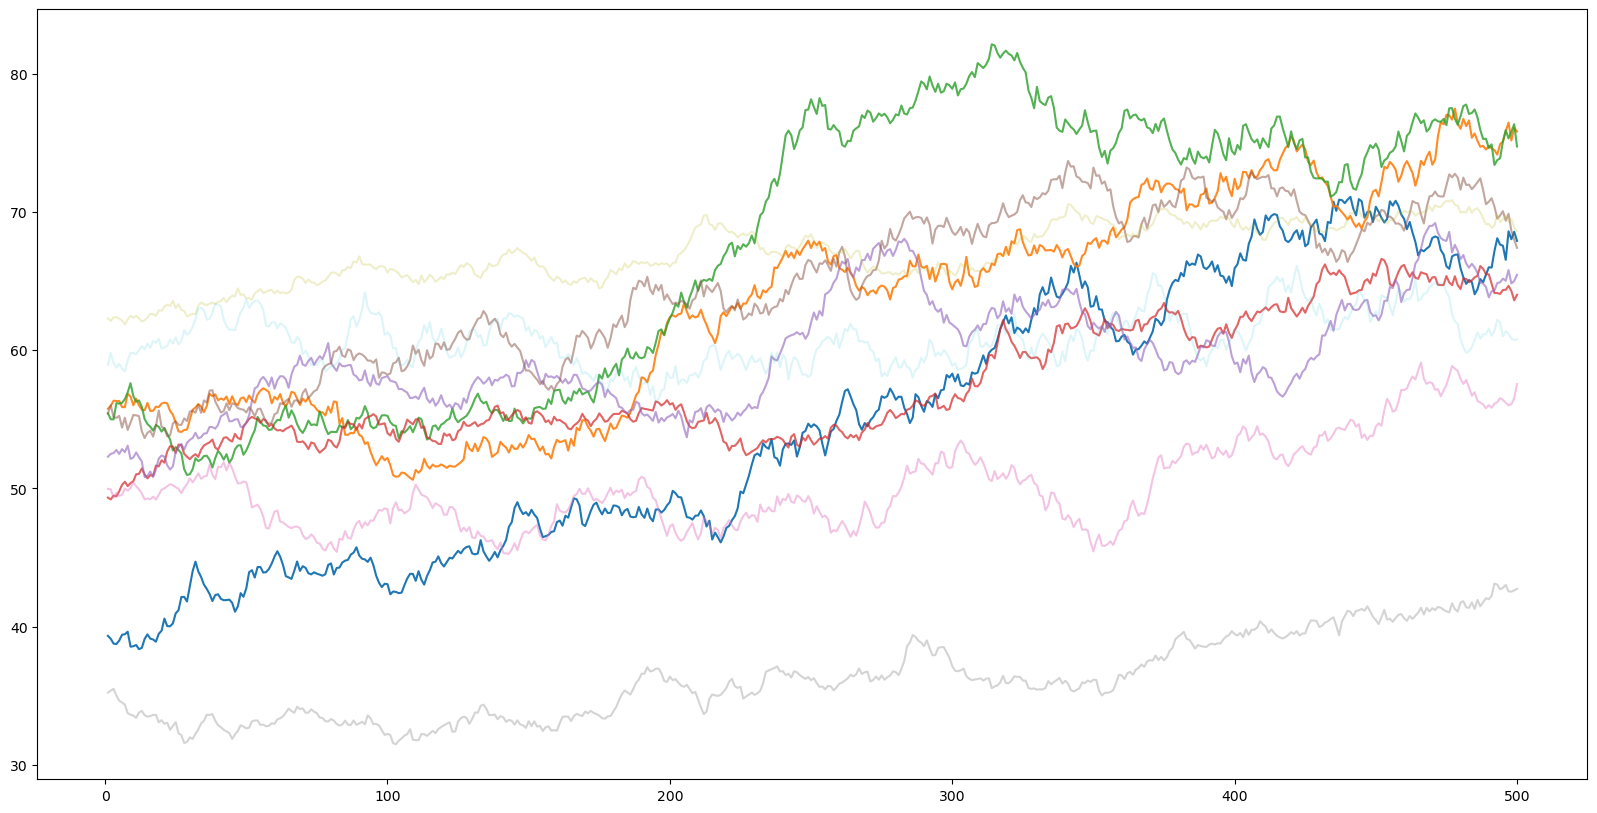

In [52]:
stock_select = [25, 41, 35, 46, 26, 20, 9, 36, 31, 43] # modify to view specific stocks
# Turn this into a function:
def plot_these_stocks(stock_selection = [], l_data = data,):
    '''
    Plots a list of stocks, with data from data as default.
    Input:
        stock_selection: a list of stocks to plot
        l_data: the data to plot (optional)
    Output:
        plt plot
    '''
    plt.figure(figsize=(20,10))
    for i in stock_selection:
        # Printing all the stocks in question with alpha decreasing by the index of the stock.
        alpha_value = max(0.1, 1 - 0.95 * (stock_selection.index(i) / len(stock_selection)))
        plt.plot(l_data[i], alpha=alpha_value)
    plt.show()
plot_these_stocks(stock_select, data)

Largest differences are: [28.57, 20.05, 19.3, 14.67, 13.16, 11.99, 7.59, 7.5, 6.31, 1.84]
At stocks: [25, 41, 35, 46, 26, 20, 9, 36, 31, 43]


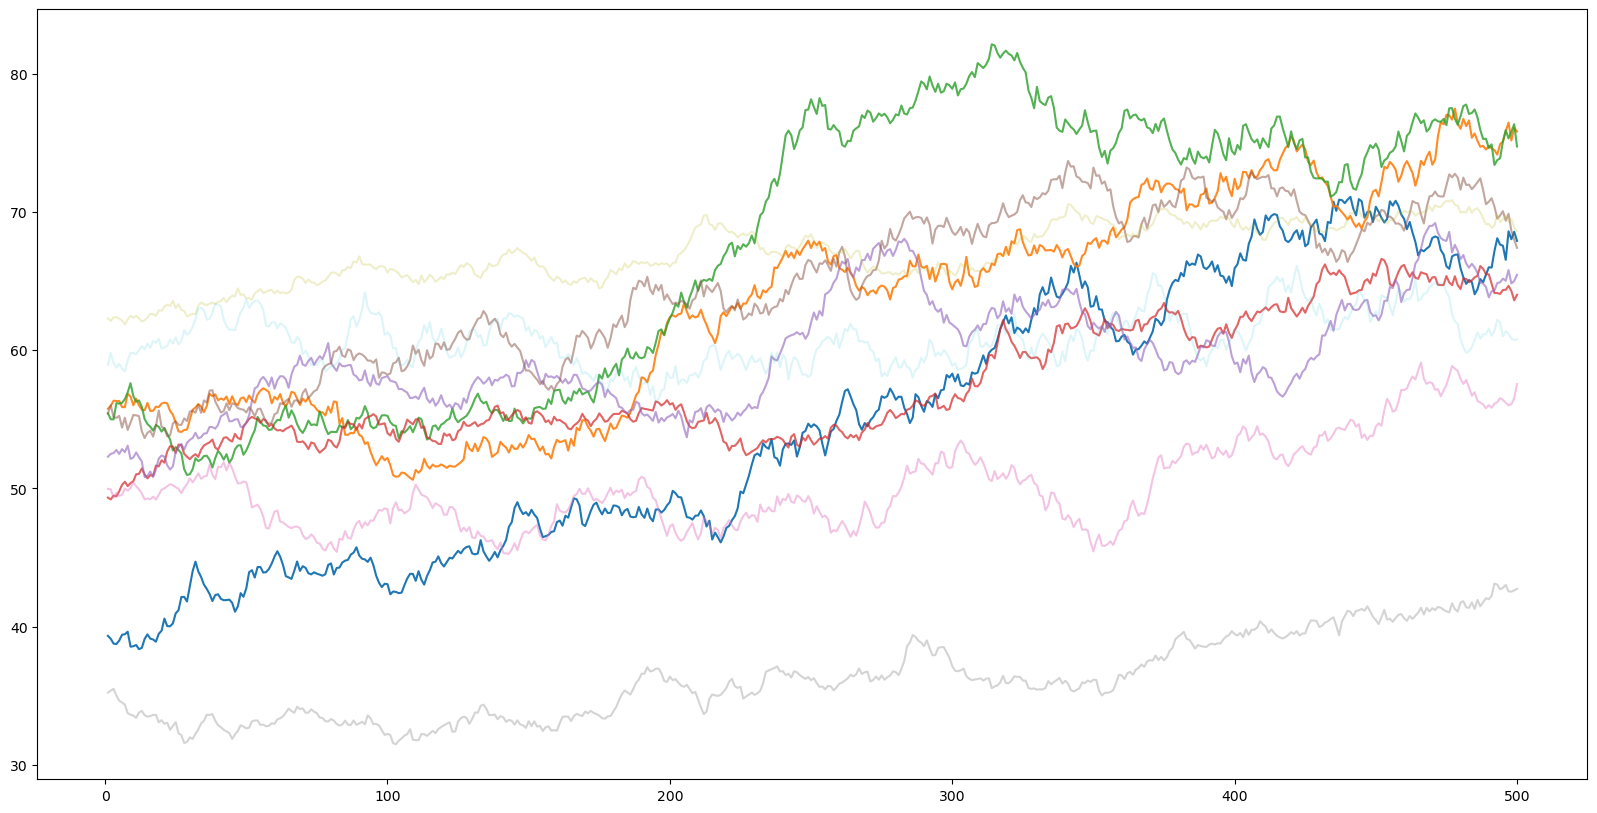

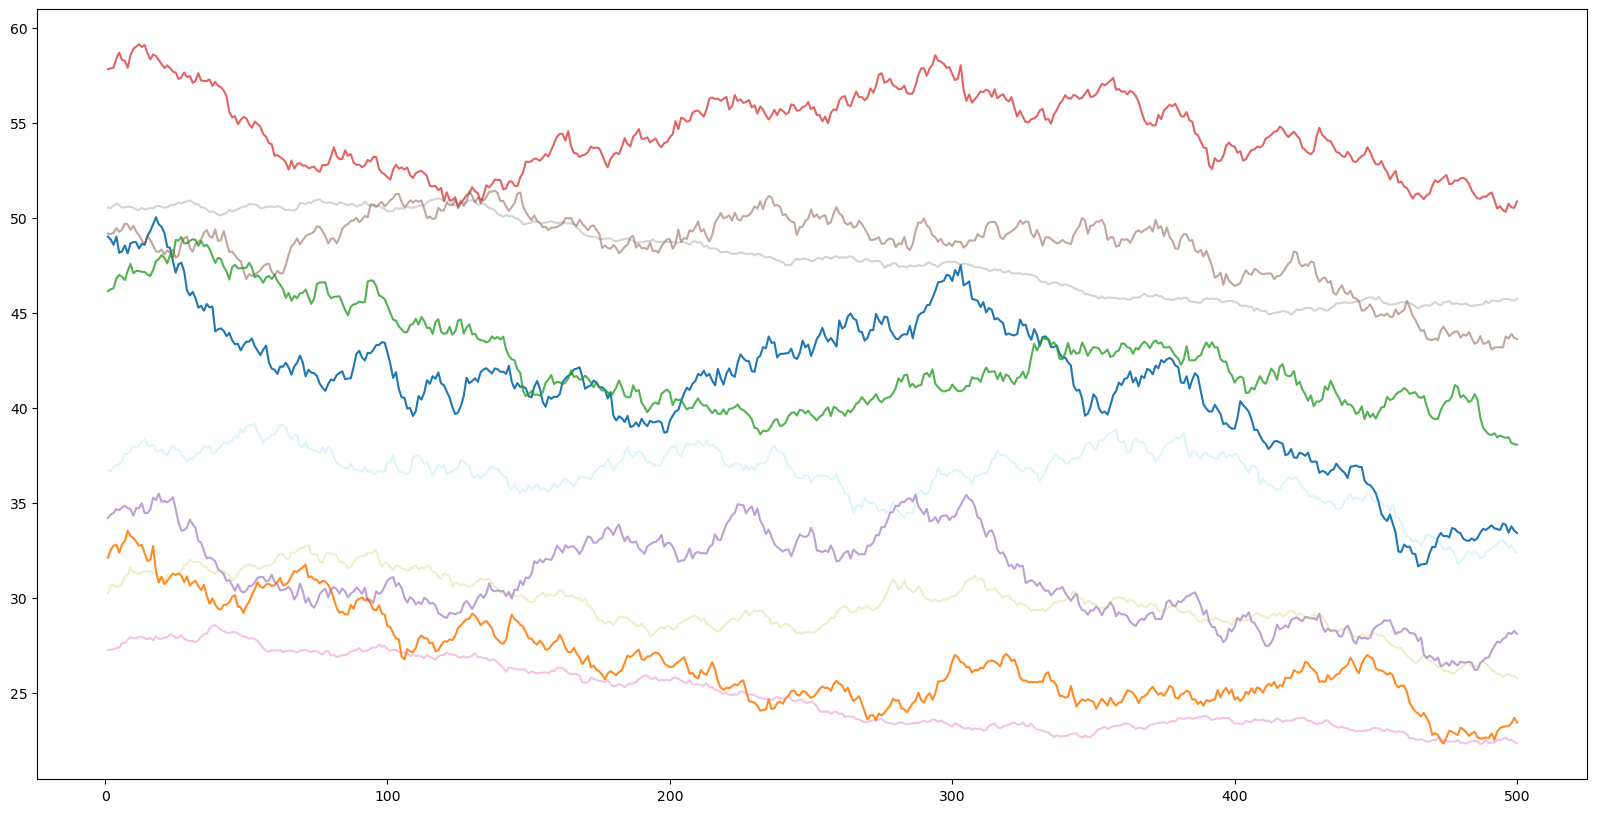

In [17]:
# Ranking the stocks based on the difference between the last and first price
diff = pd.DataFrame(data.iloc[-1] - data.iloc[0])
top = diff.sort_values(by=0, ascending=False, inplace=False).head(10)
bottom = diff.sort_values(by=0, ascending=True, inplace=False).head(10)
top_list, bottom_list = top.index.to_list(), bottom.index.to_list()
print("Largest differences are:",[round(i, 2) for i in top[0]])
print("At stocks:", top_list)
plot_these_stocks(top_list)
plot_these_stocks(bottom_list)

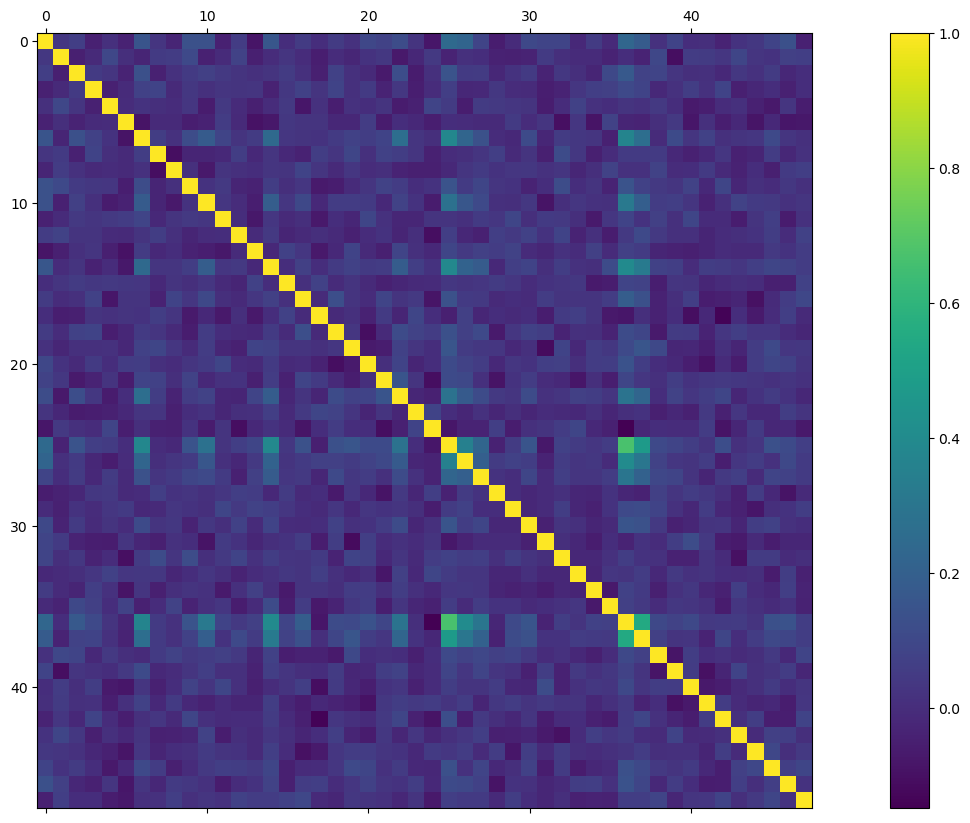

In [12]:
# Linear regression is out of the question
# We can try to find the correlation between the stocks

# Correlation matrix
corr_matrix = data_pct.corr()
plt.figure(figsize=(20,10))
plt.matshow(corr_matrix, fignum=1)
plt.colorbar()
plt.show()


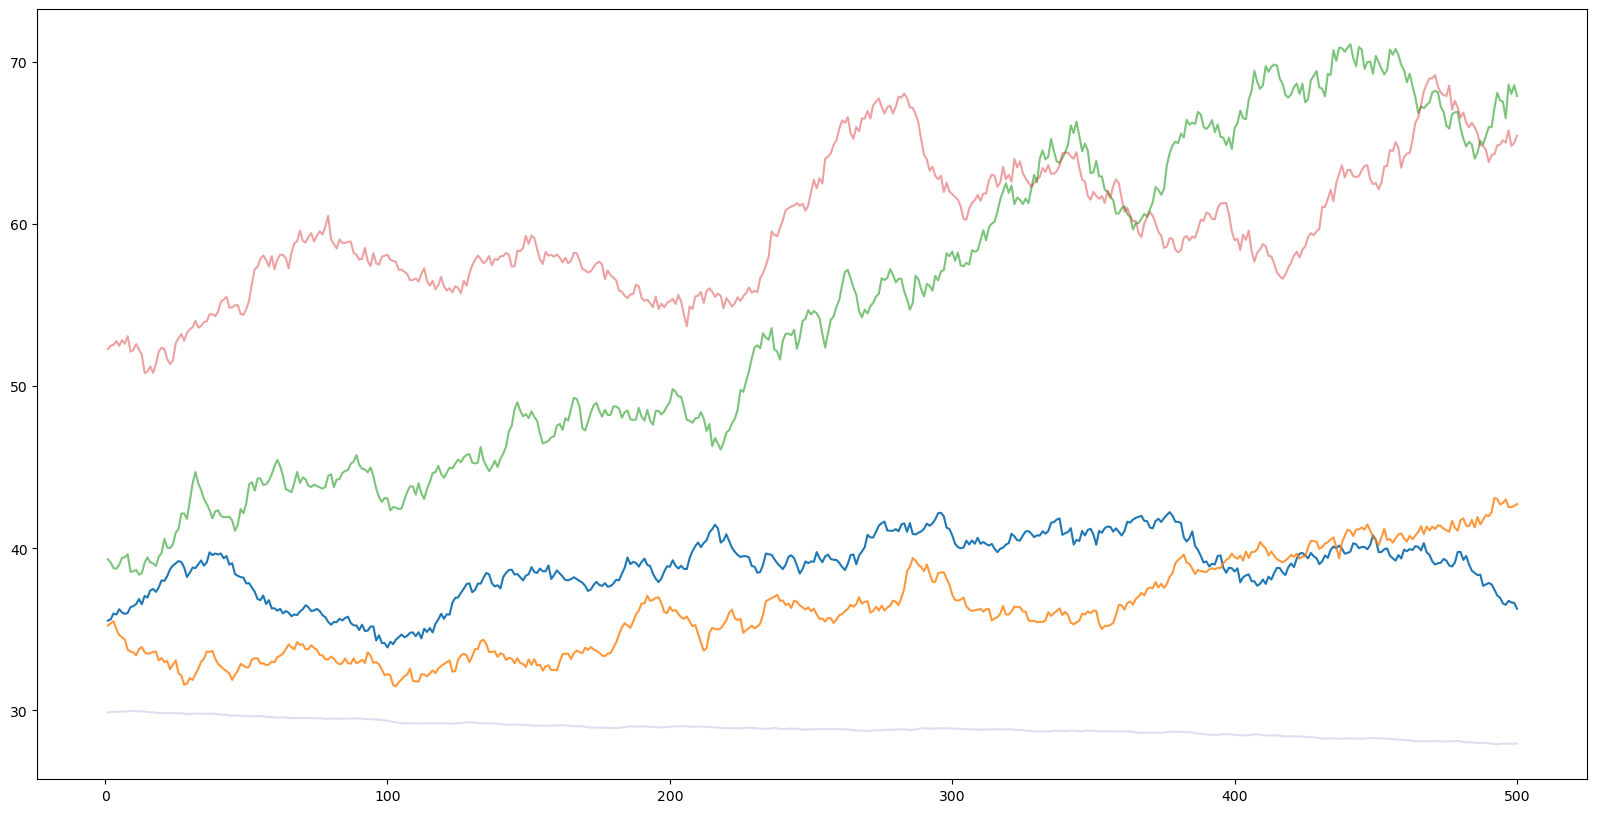

In [55]:
plot_these_stocks([37,36,25,26,27])

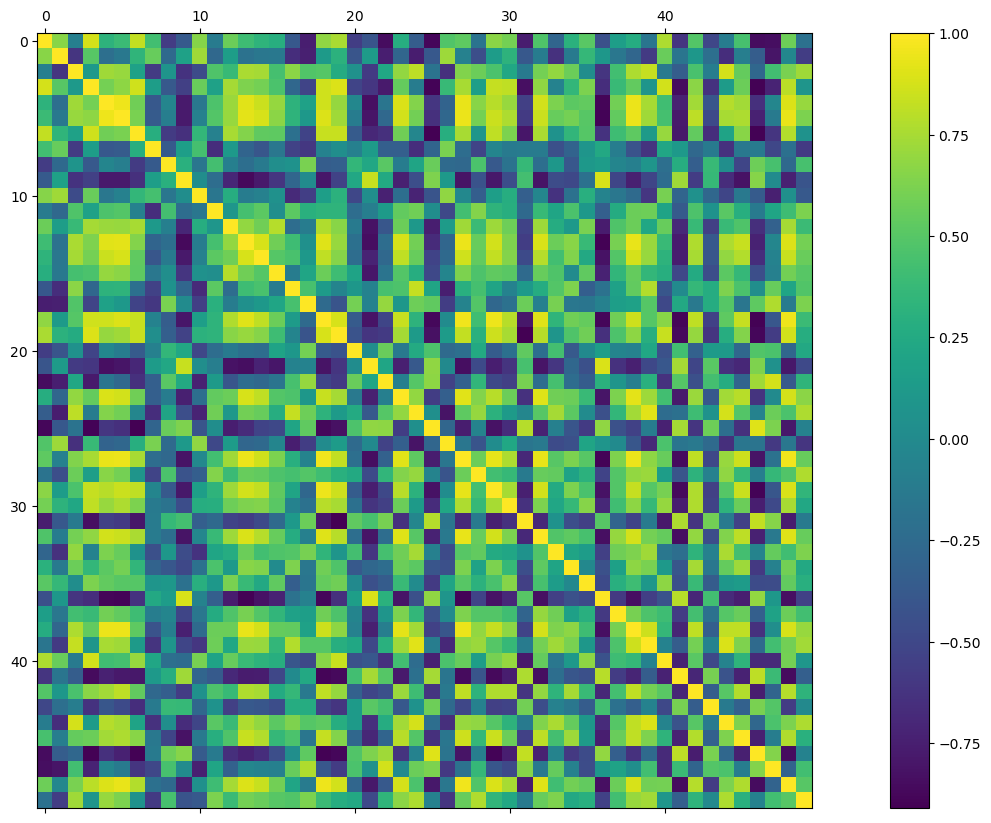

In [30]:
# Split the data into training and testing
train_data = data[:250]
test_data = data[250:]

# Test the correlation between the training and testing data
train_corr = train_data.corr()
test_corr = test_data.corr()
plt.figure(figsize=(20,10))
plt.matshow(test_corr, fignum=1)
plt.colorbar()
plt.show()



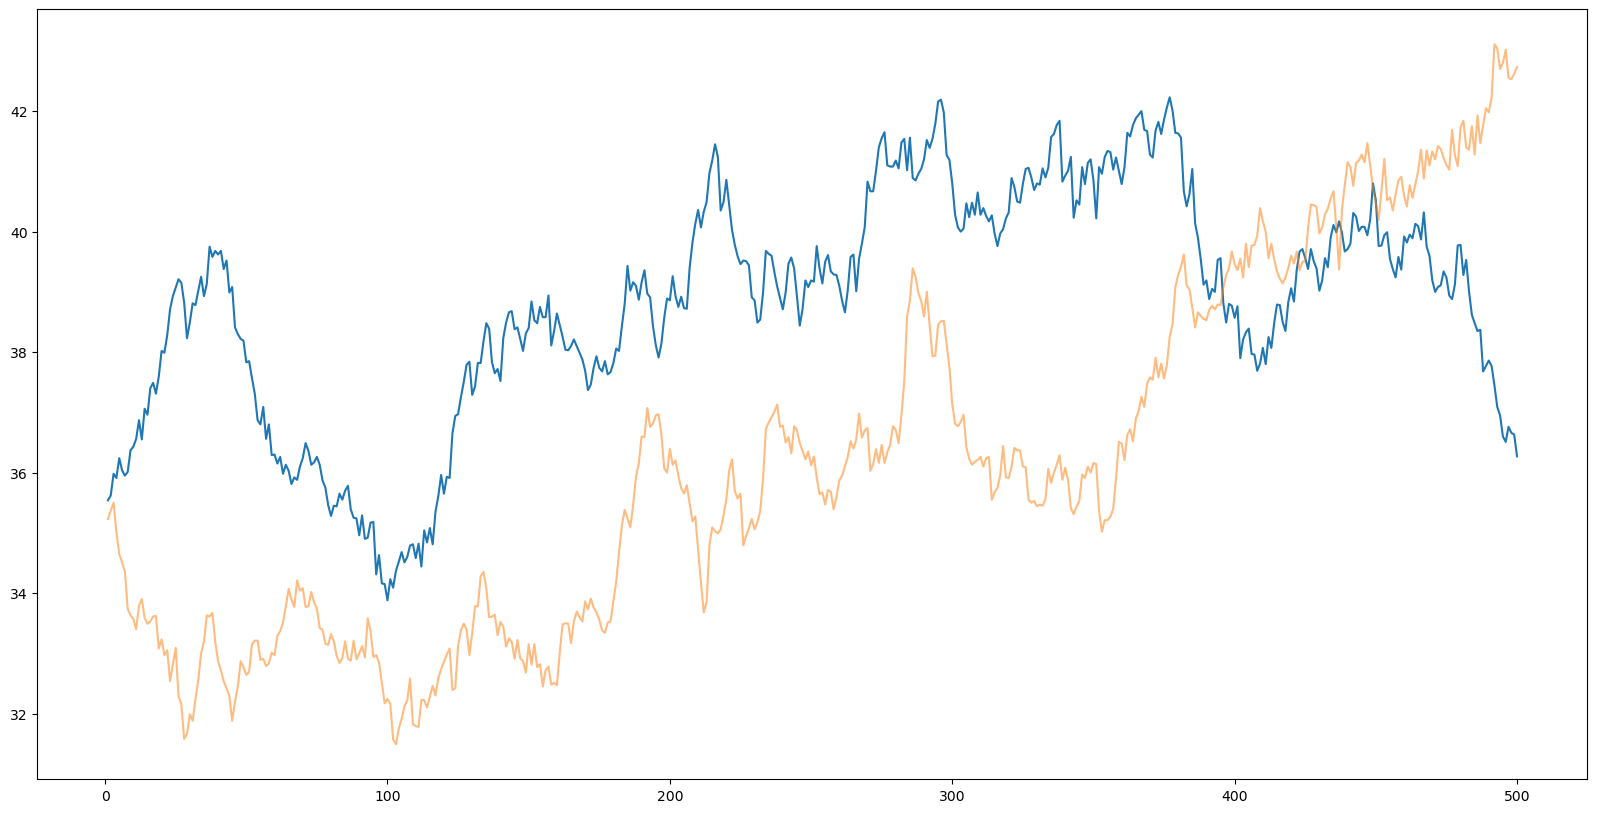

In [25]:
plot_these_stocks([37, 36])

In [47]:
data_pct = data_pct*100

<Axes: >

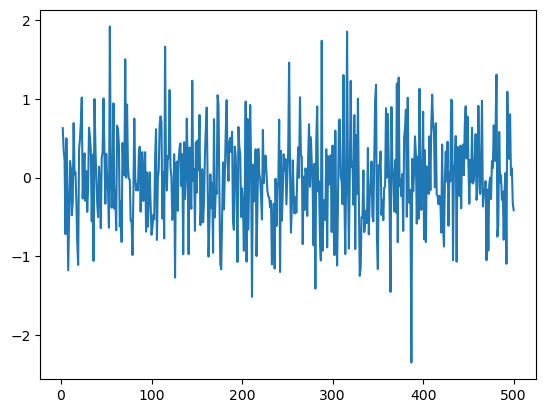

In [50]:
data_pct[1].plot()

In [75]:
# Copy data to experiment with
# Smoothing the data
data2 = data.copy()
data2 = data2.rolling(window=10).mean()
data2.bfill(inplace=True)


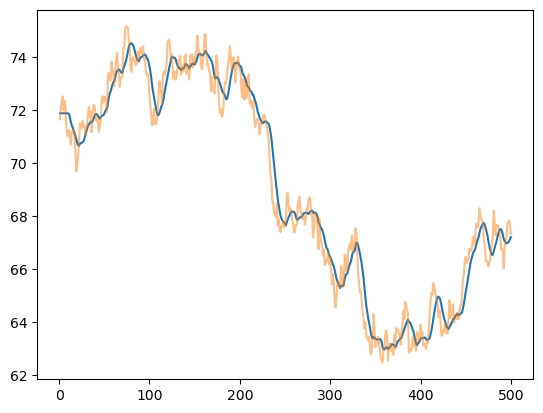

In [78]:
data2[1].plot()
data[1].plot(alpha=0.5)
plt.show()

In [80]:
train_data.head()


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
1,13.46,71.65,48.46,50.52,52.10,13.00,18.98,47.71,69.49,49.96,...,32.64,55.76,14.46,58.94,36.71,52.62,49.33,36.22,49.00,56.09
2,13.48,72.10,48.52,50.50,52.06,12.95,18.95,47.84,69.73,49.93,...,32.52,55.97,14.44,59.81,36.64,52.58,49.20,36.27,48.84,56.08
3,13.47,72.35,48.48,50.62,51.80,12.79,18.98,47.98,69.60,49.33,...,32.48,56.34,14.50,59.04,36.89,52.49,49.48,36.39,48.56,55.90
4,13.53,72.51,48.42,50.75,51.66,12.66,18.96,48.74,69.54,49.67,...,32.59,56.32,14.40,58.73,36.94,52.40,49.42,36.41,49.00,56.14
5,13.64,71.99,48.40,50.65,51.97,12.62,18.89,48.88,69.68,49.46,...,32.64,56.32,14.36,59.01,37.03,52.44,49.79,36.42,48.14,55.90
